In [24]:
import sys
import os
import glob
import cv2 as cv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets,transforms
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot, make_dot_from_trace
%matplotlib inline


In [41]:
#Task 3A
#Function that takes and reads into a dataloader the greek letters
def Greek_Nist_Data():
    transform = transforms.Compose([transforms.Resize([28,28]),
                                transforms.Grayscale(num_output_channels = 1),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.1307),(0.3081))])
    imgnames = ['001', '002', '003', '004', '005','006','007','008', '009']
    for i in range(9):
        path1 = '/Greek_Nist/alpha/alpha_' + imgnames[i] +'.png'
        image1 = cv.imread(path1, cv.IMREAD_GRAYSCALE)
        img1 = cv.bitwise_not(image1)
        newpath1 = '/Greek_Nist_data/alpha/alpha_' + imgnames[i] + '.png' 
        cv.imwrite(newpath1,img1)
    for i in range(9):
        path2 = '/Greek_Nist/beta/beta_' + imgnames[i] +'.png'
        image2 = cv.imread(path2, cv.IMREAD_GRAYSCALE)
        img2 = cv.bitwise_not(image2)
        newpath2 = '/Greek_Nist_data/beta/beta_' + imgnames[i] + '.png'         
        cv.imwrite(newpath2,img2)
    for i in range(9):
        path3 = '/Greek_Nist/gamma/gamma_' + imgnames[i] +'.png'
        image3 = cv.imread(path3, cv.IMREAD_GRAYSCALE)
        img3 = cv.bitwise_not(image3)
        newpath3 = '/Greek_Nist_data/gamma/gamma_' + imgnames[i] + '.png'         
        cv.imwrite(newpath3,img3)
        
    myData = torchvision.datasets.ImageFolder('/Greek_Nist_data/', transform = transform)
    set_loader = torch.utils.data.DataLoader(myData,batch_size=27,shuffle = False)
    img_data,img_targets = next(iter(set_loader))
    
    return img_data, img_targets

#Task3B : Function prints out one element vector of 50 values
def elem_vec(output):  
        print("Output Size of element vectors:", output[0].shape, "\n", output[0])
        
#Task3C: funcion that prints out 27 element vectors of 50 values
def elem_vec2(output):
        print("Output Size of element vectors:", output.shape, "\n", output)
        
#Task3D: Function that takes sum squared difference of all 27 images against each one alpha,beta, and gamma image
#Also plots the 27 values into a plot to see differences
def ssd_al_be_ga(output):
    arr = []
    ssd_alpha = []
    ssd_beta = []
    ssd_gamma = []
    # alpha
    for i in range(27):
        arr.append(i)
        diff = pow(output[0] - output[i],2)
        sum1 = torch.sum(diff)
        sum1 = sum1.numpy()/27
        sum1 = np.round(sum1,4)
        ssd_alpha.append(sum1)

    #beta
    for i in range(27):
        diff = pow(output[9] - output[i],2)
        sum2 = torch.sum(diff)
        sum2 = sum2.numpy()/27
        sum2 = np.round(sum2,4)
        ssd_beta.append(sum2)

#gamma
    for i in range(27):
        diff = pow(output[18] - output[i],2)
        sum3 = torch.sum(diff)
        sum3 = sum3.numpy()/27
        sum3 = np.round(sum3,5)
        ssd_gamma.append(sum3)
    
    plt.figure(1)
    x = arr
    y = ssd_alpha
    plt.scatter(x,y, label =10, color = "red" )
    plt.xlabel("Image Index")
    plt.ylabel("SSD")
    plt.title("Alpha Image")

    plt.figure(2)
    x = arr
    y = ssd_beta
    plt.scatter(x,y, label =10, color = "blue" )
    plt.xlabel("Image Index")
    plt.ylabel("SSD")
    plt.title("Beta Image")

    plt.figure(3)
    x = arr
    y = ssd_gamma
    plt.scatter(x,y, label =10, color = "green" )
    plt.xlabel("Image Index")
    plt.ylabel("SSD")
    plt.title("Gamma Image")
    
#task 3E: Function that reads in my own handwritten greek letters and puts in to a dataloader
def MyGreek_Nist_Data():
    transform = transforms.Compose([transforms.Resize([28,28]),
                                transforms.Grayscale(num_output_channels = 1),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.1307),(0.3081))])
    imgnames = ['001', '002']
    for i in range(2):
        path1 = '/MyGreek/alpha/alpha_' + imgnames[i] +'.png'
        image1 = cv.imread(path1, cv.IMREAD_GRAYSCALE)
        img1 = cv.bitwise_not(image1)
        newpath1 = '/MyGreek_data/alpha/alpha_' + imgnames[i] + '.png' 
        cv.imwrite(newpath1,img1)
    for i in range(2):
        path2 = '/MyGreek/beta/beta_' + imgnames[i] +'.png'
        image2 = cv.imread(path2, cv.IMREAD_GRAYSCALE)
        img2 = cv.bitwise_not(image2)
        newpath2 = '/MyGreek_data/beta/beta_' + imgnames[i] + '.png'         
        cv.imwrite(newpath2,img2)
    for i in range(2):
        path3 = '/MyGreek/gamma/gamma_' + imgnames[i] +'.png'
        image3 = cv.imread(path3, cv.IMREAD_GRAYSCALE)
        img3 = cv.bitwise_not(image3)
        newpath3 = '/MyGreek_data/gamma/gamma_' + imgnames[i] + '.png'         
        cv.imwrite(newpath3,img3)
        
    myData = torchvision.datasets.ImageFolder('/MyGreek/', transform = transform)
    set_loader = torch.utils.data.DataLoader(myData,batch_size=6,shuffle = False)
    img_data,img_targets = next(iter(set_loader))
    
    return img_data, img_targets

#Function that displays the SSD of the handwritten greek letters and plots them as in task 3D
def MyGreek(output,output1):
    arr = []
    ssd_myalpha = []
    #just for alpha
    for i in range(6):
        arr.append(i)
        diff1 = pow(output[0]- output1[i],2)
        sum2 = torch.sum(diff1)
        sum2 = sum2.numpy()/33
        sum2 = np.round(sum2,4)
        ssd_myalpha.append(sum2)
    
    plt.figure(4)
    x = arr
    y = ssd_myalpha
    plt.scatter(x,y, label =10, color = "red" )
    plt.xlabel("Image Index")
    plt.ylabel("SSD")
    plt.title("My greek data comapred to alpha_001 from dataset")

In [42]:
class task3_MyNet(nn.Module):
    def __init__(self):
        super(task3_MyNet,self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.flatten = nn.Flatten()
        self.fc2 = nn.Linear(50, 10)


    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(F.dropout(self.conv2(x)), 2),0.5)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        return x

In [43]:
#Main function that completes all of Task 3
def main():
    #task3A
    model = task3_MyNet()
    optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.5)
        
    model.load_state_dict(torch.load("model.pth.tar"))
    optimizer.load_state_dict(torch.load("optimizer.pth.tar"))

    
    img_data,img_targets = Greek_Nist_Data()
    img_data1,img_targets1 = MyGreek_Nist_Data()
    
    with torch.no_grad():
        output = model(img_data)  
        output1 = model(img_data1)
        
    #task 3B
    elem_vec(output)
    
    #task 3C
    print("\n One Element Vector of 50 Values")
    elem_vec2(output)
    
    #task 3D
    print("\n Element Vector of 27,50")
    ssd_al_be_ga(output)
    
    #task3E
    MyGreek(output,output1)
    

Output Size of element vectors: torch.Size([50]) 
 tensor([0.0000, 0.0000, 0.0000, 1.3785, 0.0000, 0.4650, 0.0000, 0.0000, 0.0000,
        1.1671, 0.0000, 0.0000, 0.0000, 0.1534, 0.0000, 0.0000, 0.2547, 1.2911,
        0.0000, 0.1423, 0.0000, 0.0000, 0.5517, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7098, 0.8122, 1.4140,
        1.9583, 1.4375, 0.0000, 0.0000, 0.4297, 0.0000, 0.0000, 0.6055, 2.7021,
        0.0000, 0.6870, 1.6607, 0.3102, 0.0000])

 One Element Vector of 50 Values
Output Size of element vectors: torch.Size([27, 50]) 
 tensor([[0.0000, 0.0000, 0.0000,  ..., 1.6607, 0.3102, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.2671, 0.4347, 0.0000],
        [0.0000, 0.0980, 0.0000,  ..., 1.0614, 0.2545, 0.0000],
        ...,
        [0.9356, 0.0000, 0.0000,  ..., 0.3654, 0.0000, 0.5657],
        [0.9282, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.6132],
        [0.3908, 0.1136, 0.0000,  ..., 0.2400, 0.0511, 0.5107]])

 Element Vec

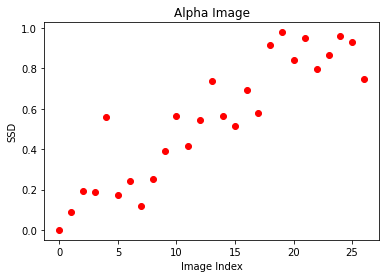

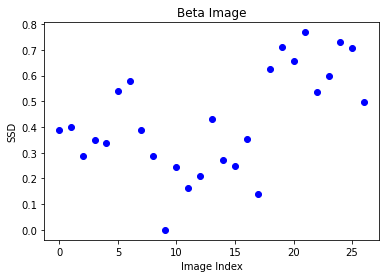

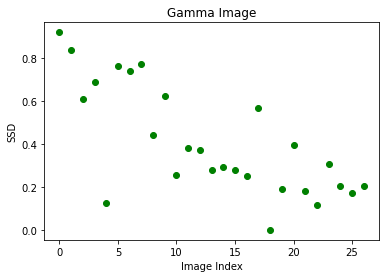

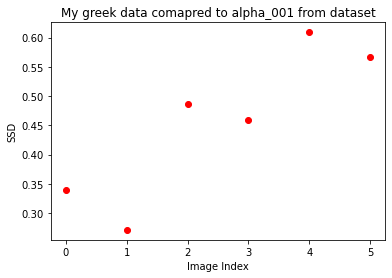

In [44]:
if __name__== "__main__":
    main()